In [1]:
import os
import numpy as np
import pandas as pd

from pandas import ExcelWriter
from pandas import ExcelFile

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
file_dir = os.path.join('/Users/digisha/Downloads/Fatigue_project/data')
file_name = os.path.join(file_dir, 'Sample_Data.xlsx')
df = pd.read_excel(file_name, sheetname='Sheet1')
df.head()

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,subject_id,question_id,answer,timestamp
0,6,1600,5,06-22-2018 22:18:46
1,6,1601,3,06-22-2018 22:18:55
2,6,1602,3,06-22-2018 22:19:02
3,6,1603,4,06-22-2018 22:19:26
4,6,1600,6,06-22-2018 23:44:43


In [3]:
#changing datatypes, time stamp in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
#only depression fatigue questionnare considererd
mask = (df['question_id'] >= 1600) & (df['question_id'] < 1700)
df_16 = df.loc[mask].reset_index(drop=True)
df_16.tail()

,subject_id,question_id,answer,timestamp
599,27,1603,0,2018-11-20 19:57:46
600,27,1600,5,2018-11-21 05:25:07
601,27,1601,3,2018-11-21 05:25:10
602,27,1602,1,2018-11-21 05:25:14
603,27,1603,0,2018-11-21 05:25:17


In [5]:
mask = (df['question_id'] == 1600)
df_1600 = df.loc[mask].reset_index(drop=True)

df_1600['time'] = 0
k = 0
df_1600['time'] = df_1600['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1600)):
        if pat == df_1600['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1600['time'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1600['time'][i] = (((df_1600['timestamp'][i] - df_1600['timestamp'][k]).days) + ((df_1600['timestamp'][i] - df_1600['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1600['time'] = df_1600['time'].round(2)
df_1600.tail(7)
#df_1600.tail()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time
144,27,1600,4,2018-11-19 20:36:13,14.01
145,27,1600,2,2018-11-20 05:56:42,14.39
146,27,1600,4,2018-11-20 09:59:13,14.56
147,27,1600,4,2018-11-20 14:10:55,14.74
148,27,1600,5,2018-11-20 18:48:51,14.93
149,27,1600,5,2018-11-20 19:57:36,14.98
150,27,1600,5,2018-11-21 05:25:07,15.37


In [6]:
mask = (df['question_id'] == 1601)
df_1601 = df.loc[mask].reset_index(drop=True)
#df_1601.tail()


df_1601['time'] = 0
k = 0
df_1601['time'] = df_1601['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1601)):
        if pat == df_1601['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1601['time'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1601['time'][i] = (((df_1601['timestamp'][i] - df_1601['timestamp'][k]).days) + ((df_1601['timestamp'][i] - df_1601['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1601['time'] = df_1601['time'].round(2)
df_1601.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time
144,27,1601,2,2018-11-19 20:36:16,14.01
145,27,1601,4,2018-11-20 05:56:44,14.39
146,27,1601,2,2018-11-20 09:59:16,14.56
147,27,1601,3,2018-11-20 14:10:58,14.74
148,27,1601,3,2018-11-20 18:48:55,14.93
149,27,1601,4,2018-11-20 19:57:40,14.98
150,27,1601,3,2018-11-21 05:25:10,15.37


In [7]:
mask = (df['question_id'] == 1602)
df_1602 = df.loc[mask].reset_index(drop=True)
#df_1602.tail()

df_1602['time'] = 0
k = 0
df_1602['time'] = df_1602['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1602)):
        if pat == df_1602['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1602['time'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1602['time'][i] = (((df_1602['timestamp'][i] - df_1602['timestamp'][k]).days) + ((df_1602['timestamp'][i] - df_1602['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1602['time'] = df_1602['time'].round(2)
df_1602.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time
144,27,1602,2,2018-11-19 20:36:18,14.01
145,27,1602,4,2018-11-20 05:57:00,14.39
146,27,1602,1,2018-11-20 09:59:18,14.56
147,27,1602,3,2018-11-20 14:11:01,14.74
148,27,1602,3,2018-11-20 18:48:59,14.93
149,27,1602,2,2018-11-20 19:57:43,14.98
150,27,1602,1,2018-11-21 05:25:14,15.37


In [8]:
mask = (df['question_id'] == 1603) 
df_1603 = df.loc[mask].reset_index(drop=True)
#df_1603.tail()

df_1603['time'] = 0
k = 0
df_1603['time'] = df_1603['time'].astype('float')
patient = [6,27]
for pat in patient:
    #print('pat',pat)
    count = 0
    #print('count',count)
    for i in range(0,len(df_1603)):
        if pat == df_1603['subject_id'][i]:
            #print('sub=pat', pat, i)
            if count == 0:
                df_1603['time'][i] = 0
                #print('i',i)
                k = i
            else:
                df_1603['time'][i] = (((df_1603['timestamp'][i] - df_1603['timestamp'][k]).days) + ((df_1603['timestamp'][i] - df_1603['timestamp'][k]).seconds/(60*60*24)))
            count += 1
df_1603['time'] = df_1603['time'].round(2)
df_1603.tail(7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,subject_id,question_id,answer,timestamp,time
144,27,1603,0,2018-11-19 20:36:21,14.01
145,27,1603,0,2018-11-20 05:57:04,14.39
146,27,1603,0,2018-11-20 09:59:21,14.56
147,27,1603,0,2018-11-20 14:11:04,14.74
148,27,1603,0,2018-11-20 18:49:03,14.93
149,27,1603,0,2018-11-20 19:57:46,14.98
150,27,1603,0,2018-11-21 05:25:17,15.37


In [9]:
df_1600['answer']=df_1600.answer.astype('int64')
df_1601['answer']=df_1601.answer.astype('int64')
df_1602['answer']=df_1602.answer.astype('int64')
df_1603['answer']=df_1603.answer.astype('int64')

mask = (df_1600['subject_id'] == 6) 
df_1600_6 = df_1600.loc[mask].reset_index(drop=True)

mask = (df_1601['subject_id'] == 6) 
df_1601_6 = df_1601.loc[mask].reset_index(drop=True)

mask = (df_1602['subject_id'] == 6) 
df_1602_6 = df_1602.loc[mask].reset_index(drop=True)

mask = (df_1603['subject_id'] == 6) 
df_1603_6 = df_1603.loc[mask].reset_index(drop=True)

mask = (df_1600['subject_id'] == 27) 
df_1600_27 = df_1600.loc[mask].reset_index(drop=True)

mask = (df_1601['subject_id'] == 27) 
df_1601_27 = df_1601.loc[mask].reset_index(drop=True)

mask = (df_1602['subject_id'] == 27) 
df_1602_27 = df_1602.loc[mask].reset_index(drop=True)

mask = (df_1603['subject_id'] == 27) 
df_1603_27 = df_1603.loc[mask].reset_index(drop=True)

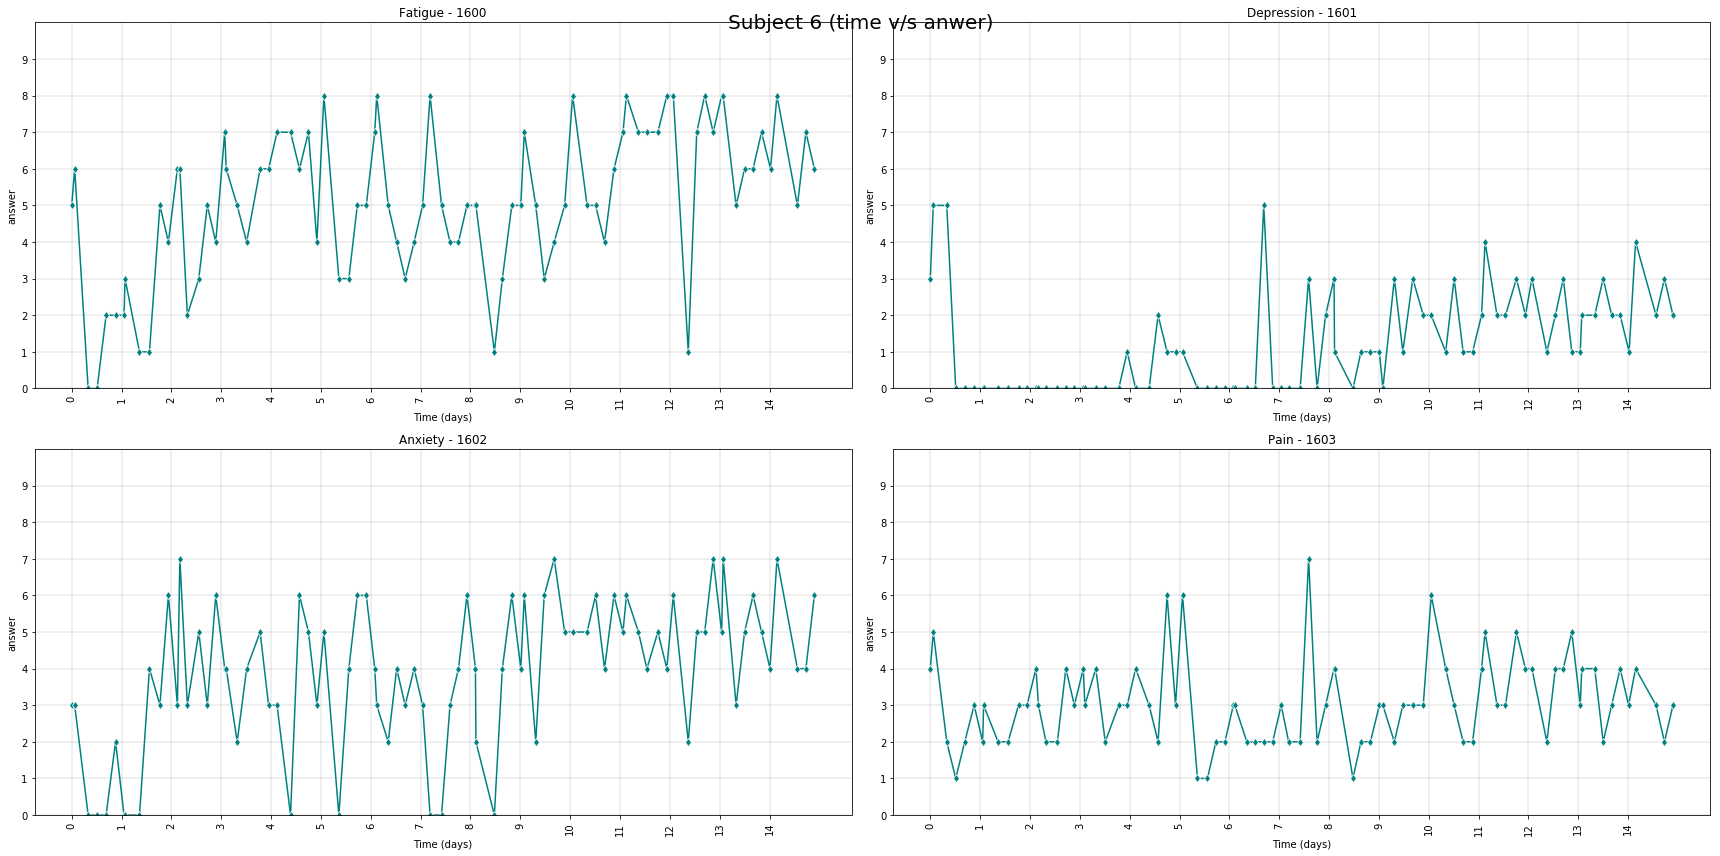

In [19]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 6 (time v/s anwer)', fontsize=15)

plt.subplot(2, 2, 4)
x = df_1603_6["time"]
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Pain - 1603')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", color = 'teal', data=df_1603_6,  
             marker = 'd')
plt.xlabel('Time (days)')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
x = df_1602_6["time"]
#plt.figure(figsize = (20,8))
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Anxiety - 1602')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", color = 'teal', data=df_1602_6, 
             marker = 'd')
plt.xlabel('Time (days)')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
x = df_1601_6["time"]
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Depression - 1601')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", data=df_1601_6, color = 'teal', marker = 'd')
plt.xlabel('Time (days)')
plt.tight_layout()

plt.subplot(2, 2, 1)
x = df_1600_6["time"]
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Fatigue - 1600')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", color = 'teal', data=df_1600_6,  
             marker = 'd')
plt.xlabel('Time (days)')
plt.tight_layout()

plt.show()

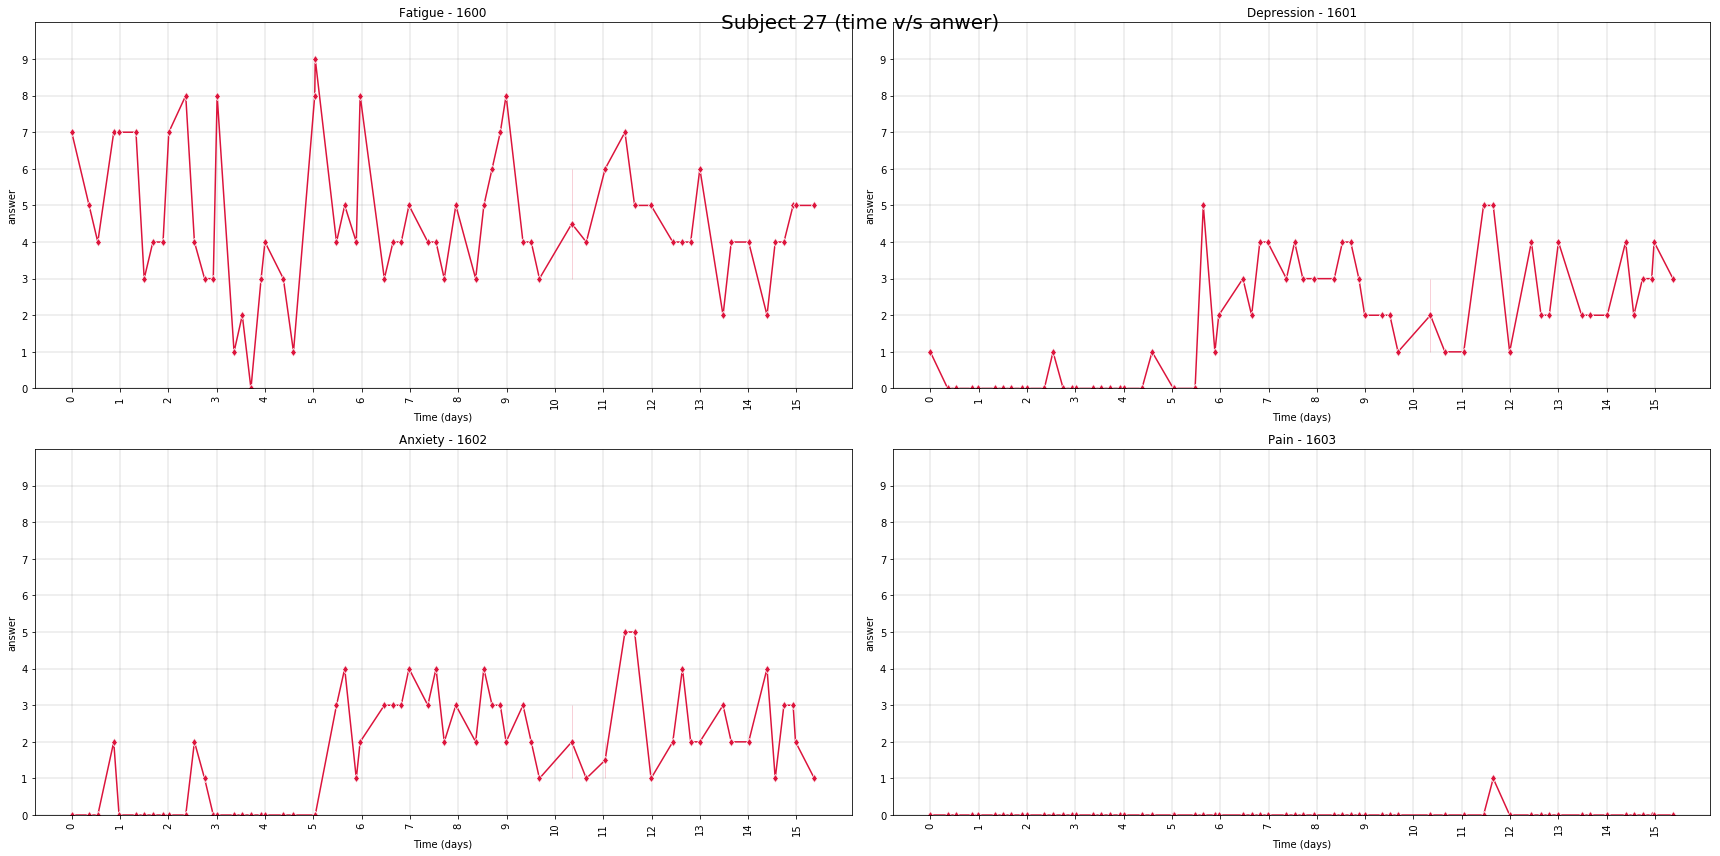

In [20]:
plt.figure(figsize = (24,12))
plt.suptitle('Subject 27 (time v/s anwer)', fontsize=15)

plt.subplot(2, 2, 4)
x = df_1603_27["time"]
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Pain - 1603')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", color = 'crimson', data=df_1603_27,  
             marker = 'd')
plt.xlabel('Time (days)')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
x = df_1602_27["time"]
#plt.figure(figsize = (20,8))
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Anxiety - 1602')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", color = 'crimson', data=df_1602_27, 
             marker = 'd')
plt.xlabel('Time (days)')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
x = df_1601_27["time"]
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Depression - 1601')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", data=df_1601_27, color = 'crimson', marker = 'd')
#plt.legend(loc='upper right')
plt.xlabel('Time (days)')
plt.tight_layout()

plt.subplot(2, 2, 1)
x = df_1600_27["time"]
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, max(x), 1),rotation='vertical')
plt.title('Fatigue - 1600')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
sns.lineplot(x = x, y="answer", color = 'crimson', data=df_1600_27,  
             marker = 'd')
#plt.legend(loc='upper right')
plt.xlabel('Time (days)')
plt.tight_layout()
plt.show()